In [184]:
from metric_utils import *
import numpy as np
import matplotlib.pyplot as plt
from model import get_model
import torch
import yaml
from transformers import AutoTokenizer, DataCollatorForLanguageModeling
from sklearn.preprocessing import label_binarize


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
tokenizer = AutoTokenizer.from_pretrained('../data/AptamerBERT_tokenizer')

y_true_list, y_pred_list = load_test_predictions(filename='/glade/u/home/mlsample/work/aptamer_transformer/results/mlm/test_predictions.pkl')
y_true_flat = np.concatenate(y_true_list)

y_pred_flat_src = []
y_pred_flat_tgt = []

for y_pred in y_pred_list:
    
    y_pred_flat_src.extend(y_pred[0])
    y_pred_flat_tgt.extend(y_pred[1])

y_preds = np.array(y_pred_flat_src)
target = np.array(y_pred_flat_tgt)
y_true = np.array(y_true_flat)

y_true_tokenized = np.array(tokenizer(list(map(lambda x: ' '.join(x), y_true)), padding=True).input_ids)
y_preds_tokenized = np.array(np.argmax(y_preds,axis=2))

processed_preds, processed_true = process_data(y_preds, target)
masked_logits = extract_masked_logits(y_preds, target)

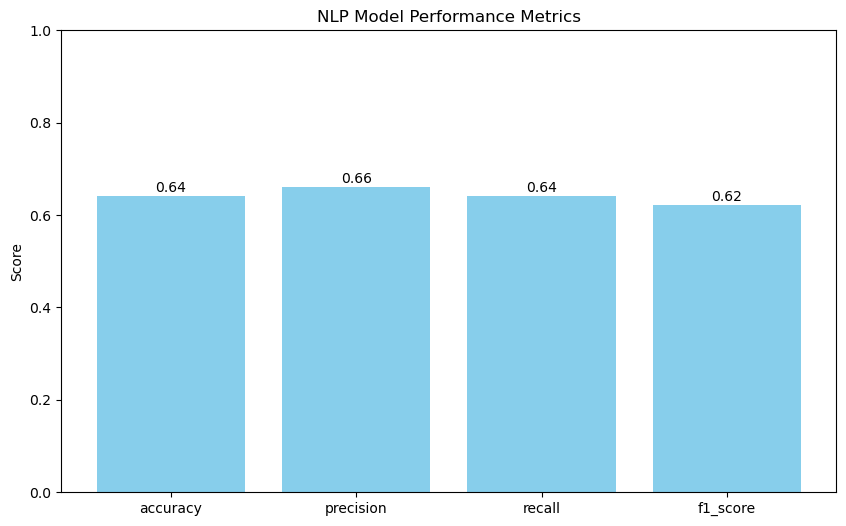

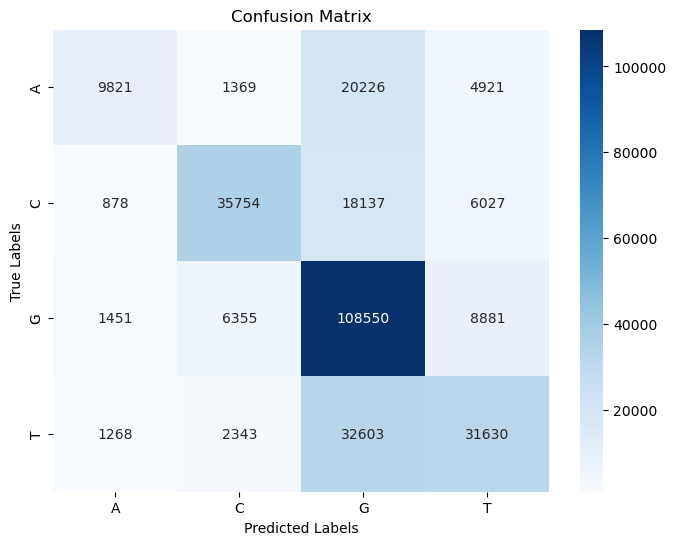

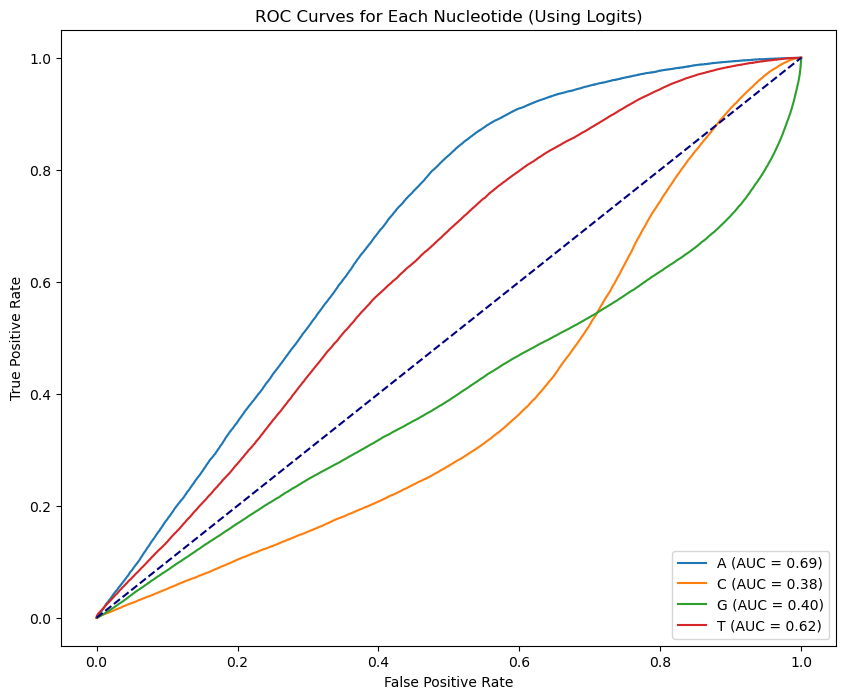


Metrics for nucleotide A:
  Accuracy: 0.2703
  Sensitivity: 0.2703
  Specificity: 0.9858
  MCC: 0.4036

Metrics for nucleotide C:
  Accuracy: 0.5881
  Sensitivity: 0.5881
  Specificity: 0.9561
  MCC: 0.6074

Metrics for nucleotide G:
  Accuracy: 0.8668
  Sensitivity: 0.8668
  Specificity: 0.5698
  MCC: 0.4452

Metrics for nucleotide T:
  Accuracy: 0.4662
  Sensitivity: 0.4662
  Specificity: 0.9108
  MCC: 0.4178


In [194]:
plot_metrics(processed_true, processed_preds)
plot_confusion_matrix(processed_true, processed_preds)
plot_roc_auc_from_logits(masked_logits, processed_true)
per_token_metrics(processed_true, processed_preds)


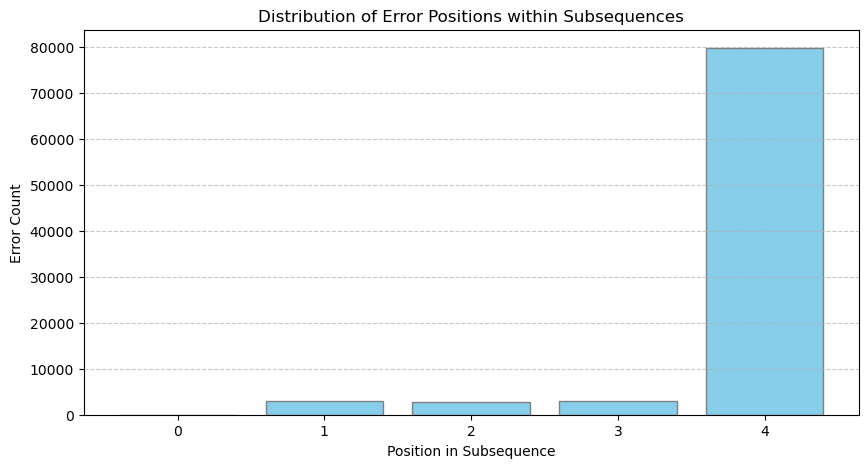

In [191]:
common_error_subsequences_with_pos = find_common_error_subsequences_around_masked(y_true_tokenized, y_preds_tokenized, target, window_size=9)

plot_error_position_distribution(common_error_subsequences_with_pos)

In [192]:
common_error_subsequences_with_pos

[(((6, 6, 6, 6, 6, 5, 5, 5, 5), 4), 404),
 (((6, 6, 6, 6, 5, 6, 6, 6, 6), 4), 363),
 (((6, 6, 6, 6, 7, 6, 6, 6, 6), 4), 335),
 (((6, 6, 6, 7, 7, 6, 6, 6, 6), 4), 282),
 (((6, 6, 6, 5, 6, 5, 5, 5, 5), 4), 238),
 (((6, 6, 5, 5, 6, 5, 5, 5, 5), 4), 230),
 (((6, 6, 5, 5, 5, 6, 6, 6, 7), 4), 223),
 (((6, 6, 6, 6, 7, 6, 6, 6, 5), 4), 221),
 (((5, 5, 5, 5, 6, 5, 5, 5, 5), 4), 219),
 (((6, 6, 6, 6, 7, 6, 6, 6, 7), 4), 197),
 (((6, 6, 6, 6, 6, 6, 6, 6, 6), 4), 183),
 (((6, 6, 6, 6, 5, 6, 6, 6, 5), 4), 179),
 (((6, 6, 6, 6, 5, 6, 5, 5, 5), 4), 176),
 (((7, 4, 6, 6, 7, 7, 4, 6, 6), 4), 171),
 (((6, 6, 7, 7, 6, 6, 6, 6, 6), 4), 171),
 (((4, 6, 6, 6, 4, 6, 6, 6, 6), 4), 170),
 (((6, 6, 6, 7, 4, 7, 6, 6, 6), 4), 169),
 (((6, 6, 6, 7, 7, 7, 6, 6, 6), 4), 169),
 (((7, 6, 6, 6, 7, 6, 6, 6, 6), 4), 169),
 (((6, 6, 6, 6, 5, 5, 5, 5, 5), 4), 168),
 (((6, 6, 6, 7, 4, 6, 6, 6, 7), 4), 166),
 (((6, 6, 6, 6, 5, 6, 6, 5, 5), 4), 164),
 (((6, 6, 6, 7, 7, 5, 6, 6, 6), 4), 161),
 (((6, 6, 6, 6, 5, 5, 6, 6, 6), 4)

In [ ]:
accuracy, precision, recall, fscore, c_matrix = evaluate_classification(y_true_flat, y_pred_flat)

In [ ]:
plot_classification_metrics(y_true_flat, y_pred_flat, class_names=['Low E', 'high E'])

In [ ]:
mse, rmse, mae, r2, mape, explained_variance = evaluate_regression_model(y_true_flat, y_pred_flat)

In [ ]:
plot_mean_loss('../results/mlm/loss_data.json',221)

In [165]:
y_preds_tokenized.shape, y_true_tokenized.shape

((96582, 42), (96582, 42))

In [ ]:
y_true_spaced = np.array(list(map(lambda x: ' '.join(x), y_true)), dtype=object)
y_preds_decoded = np.array(tokenizer.batch_decode(np.argmax(y_preds,axis=2)), dtype=object)